In [13]:
%matplotlib inline
# import functions from python directory
import sys
sys.path.append("/home/bgreene/SBL_LES/python/")
import seaborn
import cmocean
import xrft
import numpy as np
import xarray as xr
from scipy.signal import detrend
from matplotlib import pyplot as plt
from matplotlib import rc
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import MultipleLocator
from LESnc import load_full, load_timeseries

In [118]:
# plotting setup
rc('font',weight='normal',size=20,family='serif',serif='Times New Roman')
rc('text',usetex='True')
rc('figure',facecolor='white')
cmap = seaborn.color_palette("Spectral", as_cmap=True)
cmap2 = seaborn.color_palette("cubehelix_r", as_cmap=True)

In [110]:
# directories
# figure save
figdir = "/home/bgreene/SBL_LES/figures/LSM/v2/"
# list of simulations to loop over
sims = ["cr0.10_u08", "cr0.25_u08", "cr0.33_u08", "cr0.50_u08",
        "cr1.00_u08", "cr1.50_u08", "cr2.00_u08", "cr2.50_u08"]
# empty list to construct paths and store
dnc_all = []
for sim in sims:
    dnc = f"/home/bgreene/simulations/{sim}_192/output/netcdf/"
    dnc_all.append(dnc)

# Plot cases A and E instantaneous cross sections
Row 1: $u'(x,y;z/h=0.1)$

Row 2: $\theta'(x,y;z/h=0.1)$

Row 3: $u'(x,z;y=L_y/2)$

Col 1: Case A

Col 2: Case E

In [104]:
# load these cases
dd1, s1 = load_full(dnc_all[0], 1260000, 1260000, 1000, 0.02, True, True)
dd2, s2 = load_full(dnc_all[4], 1260000, 1260000, 1000, 0.02, True, True)
# grab coordinates
xh1 = dd1.x/s1.h
yh1 = dd1.y/s1.h
zh1 = dd1.z/s1.h
xh2 = dd2.x/s2.h
yh2 = dd2.y/s2.h
zh2 = dd2.z/s2.h
# calculate parameters to be plotted
# u'
up1 = (dd1.u_rot - dd1.u_rot.mean(dim=("x","y"))).isel(time=0)/s1.ustar0
up2 = (dd2.u_rot - dd2.u_rot.mean(dim=("x","y"))).isel(time=0)/s2.ustar0
# theta'
Tp1 = (dd1.theta - dd1.theta.mean(dim=("x","y"))).isel(time=0)/s1.tstar0
Tp2 = (dd2.theta - dd2.theta.mean(dim=("x","y"))).isel(time=0)/s2.tstar0
# calculate indices for plotting
# z/h = 0.1
jz1 = abs(zh1 - 0.1).argmin()
jz2 = abs(zh2 - 0.1).argmin()
# y/h = 2
jy1 = abs(yh1 - 2.0).argmin()
jy2 = abs(yh2 - 2.0).argmin()

Loading files...
Reading file: /home/bgreene/simulations/cr0.10_u08_192/output/netcdf/average_statistics.nc
Loading files...
Reading file: /home/bgreene/simulations/cr1.00_u08_192/output/netcdf/average_statistics.nc


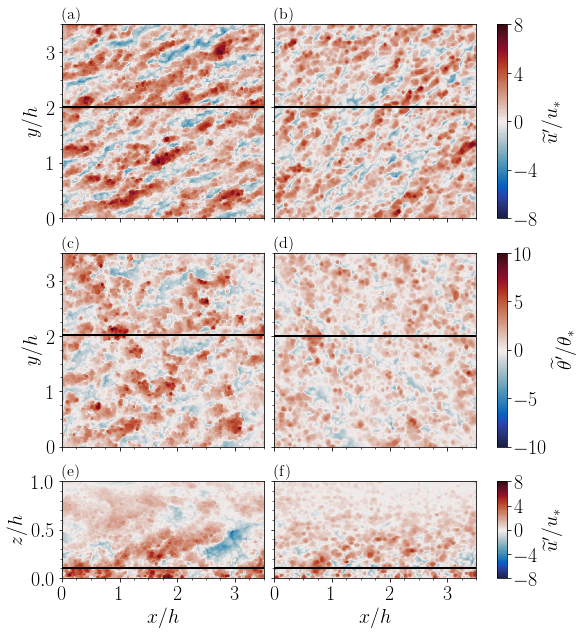

In [123]:
# initialize figure
fig = plt.figure(constrained_layout=True, figsize=(8, 8.7))
# add gridspec
gs = GridSpec(5, 2, figure=fig)
# define axes
ax1 = fig.add_subplot(gs[:2, 0]) # top left
ax2 = fig.add_subplot(gs[:2, 1], sharex=ax1, sharey=ax1) # top right
ax3 = fig.add_subplot(gs[2:4, 0], sharex=ax1, sharey=ax1) # mid left
ax4 = fig.add_subplot(gs[2:4, 1], sharex=ax1, sharey=ax1) # mid right
ax5 = fig.add_subplot(gs[-1, 0], sharex=ax1) # bottom left
ax6 = fig.add_subplot(gs[-1, 1], sharex=ax1, sharey=ax5) # bottom right
# define contour levels
levelu = np.linspace(-8, 8, 81)
levelT = np.linspace(-10, 10, 101)
cmap = cmocean.cm.balance
# plot
# row 1: u', z/h = 0.1
cfax1 = ax1.contourf(xh1, yh1, up1.isel(z=jz1).T, cmap=cmap, levels=levelu)
cfax2 = ax2.contourf(xh2, yh2, up2.isel(z=jz2).T, cmap=cmap, levels=levelu)
# row 2: T', z/h = 0.1
cfax3 = ax3.contourf(xh1, yh1, Tp1.isel(z=jz1).T, cmap=cmap, levels=levelT)
cfax4 = ax4.contourf(xh2, yh2, Tp2.isel(z=jz2).T, cmap=cmap, levels=levelT)
# row 3: y = Ly/2
cfax5 = ax5.contourf(xh1, zh1, up1.isel(y=jy1).T, cmap=cmap, levels=levelu)
cfax6 = ax6.contourf(xh2, zh2, up2.isel(y=jy2).T, cmap=cmap, levels=levelu)
# horizontal lines showing cross sections
ax1.axhline(yh1[jy1], c="k", lw=2)
ax2.axhline(yh2[jy2], c="k", lw=2)
ax3.axhline(yh1[jy1], c="k", lw=2)
ax4.axhline(yh2[jy2], c="k", lw=2)
ax5.axhline(zh1[jz1], c="k", lw=2)
ax6.axhline(zh2[jz2], c="k", lw=2)
# colorbars
cb12 = fig.colorbar(cfax1, ax=[ax1, ax2], location="right", ticks=MultipleLocator(4))
cb34 = fig.colorbar(cfax3, ax=[ax3, ax4], location="right", ticks=MultipleLocator(5))
cb56 = fig.colorbar(cfax5, ax=[ax5, ax6], location="right", ticks=MultipleLocator(4), aspect=10)
# colorbar labels
cb12.ax.set_ylabel("$\\widetilde{u}'/u_{*}$")
cb34.ax.set_ylabel("$\\widetilde{\\theta}'/\\theta_{*}$")
cb56.ax.set_ylabel("$\\widetilde{u}'/u_{*}$")
# axis limits
ax1.set_xlim([0, 3.5])
ax1.set_ylim([0, 3.5])
ax5.set_ylim([0, 1])
# remove axis tick labels
ax1.tick_params(labelbottom=False, labelleft=True)
ax2.tick_params(labelbottom=False, labelleft=False)
ax3.tick_params(labelbottom=False, labelleft=True)
ax4.tick_params(labelbottom=False, labelleft=False)
ax5.tick_params(labelbottom=True, labelleft=True)
ax6.tick_params(labelbottom=True, labelleft=False)
# format axis ticks
ax1.yaxis.set_major_locator(MultipleLocator(1))
ax1.yaxis.set_minor_locator(MultipleLocator(0.25))
ax5.yaxis.set_major_locator(MultipleLocator(0.5))
ax5.yaxis.set_minor_locator(MultipleLocator(0.1))
ax5.xaxis.set_major_locator(MultipleLocator(1))
ax5.xaxis.set_minor_locator(MultipleLocator(0.25))
# label axes
ax1.set_ylabel("$y/h$")
ax3.set_ylabel("$y/h$")
ax5.set_ylabel("$z/h$")
ax5.set_xlabel("$x/h$")
ax6.set_xlabel("$x/h$")
# make vector graphics nice
cb12.solids.set_edgecolor("face")
cb34.solids.set_edgecolor("face")
cb56.solids.set_edgecolor("face")
for cax in [cfax1, cfax2, cfax3, cfax4, cfax5, cfax6]:
    for c in cax.collections:
        c.set_edgecolor("face")
# label subpanels in top left title space
for iax, lab in zip(fig.axes, list("abcdef")):
    iax.set_title(f"({lab})", fontsize=16, loc="left")
# save figure
fsave = f"{figdir}u_theta_inst_xy_xz.pdf"
fig.savefig(fsave, format="pdf", dpi=300)

(0.0, 1.0)

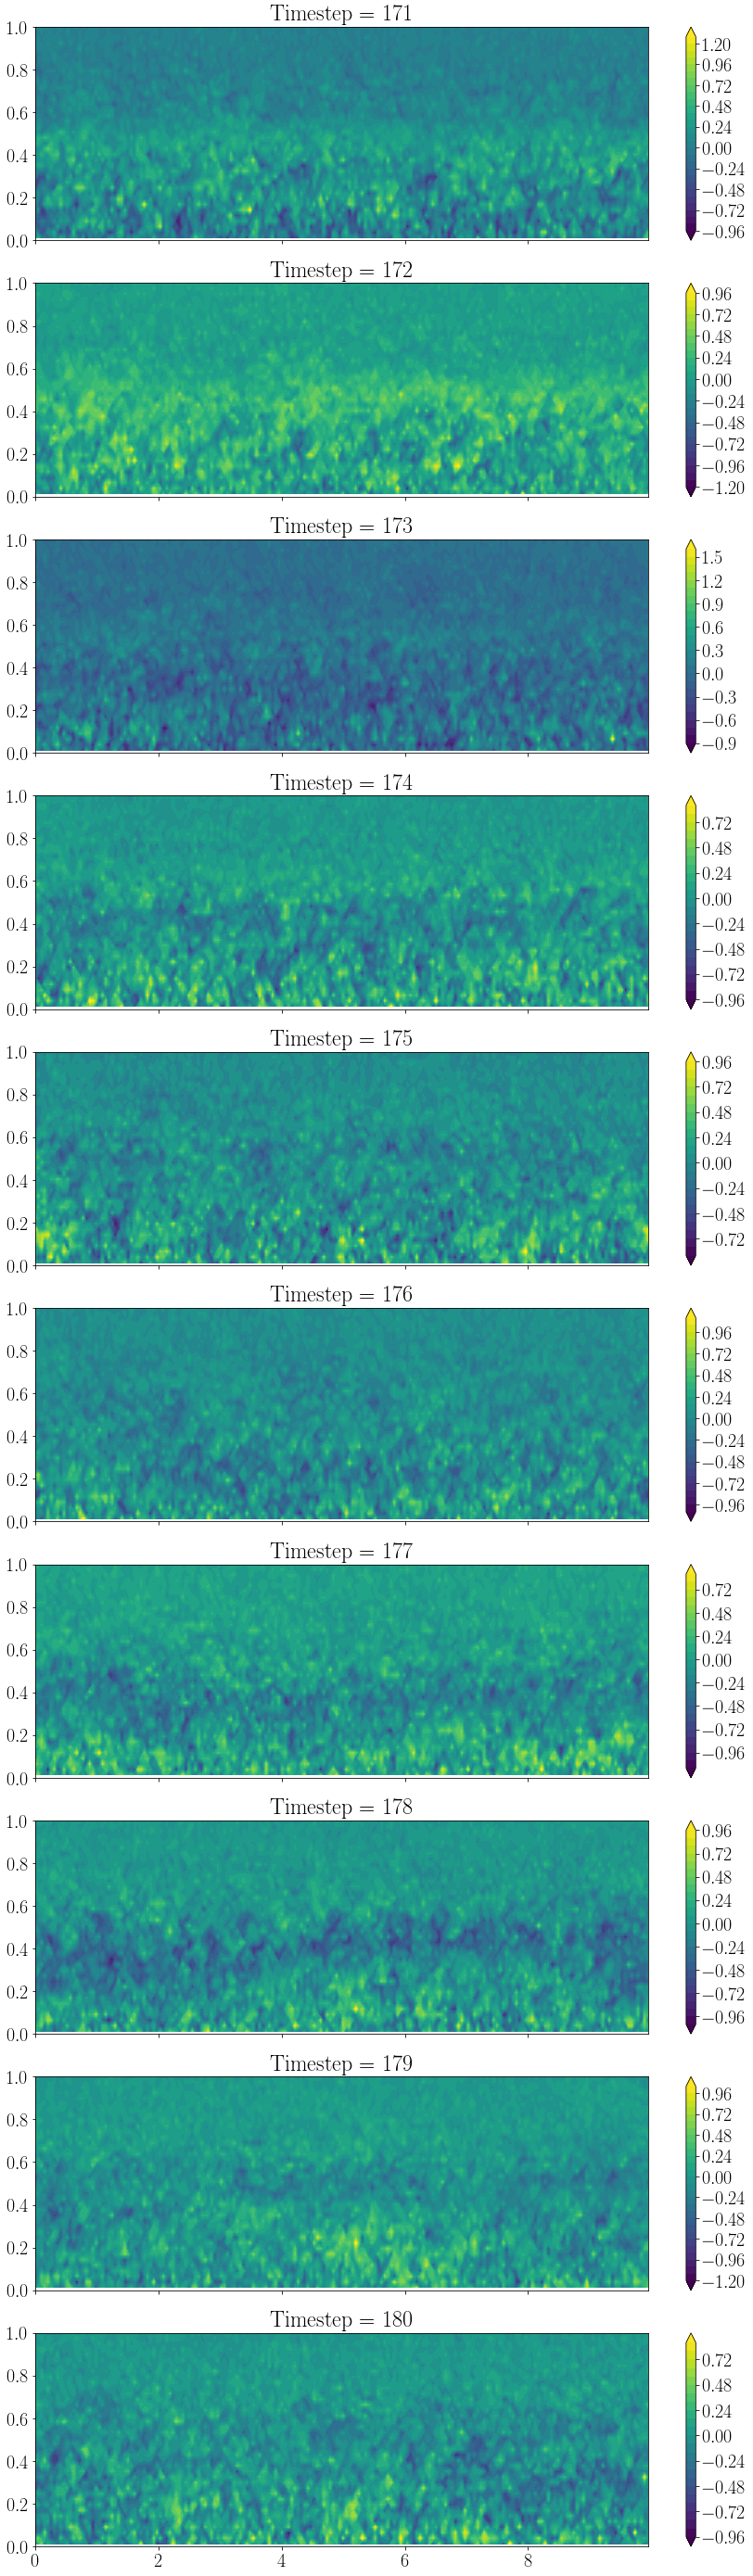

In [5]:
# plot x-z: u_rot
up = dd.u_rot - dd.u_rot.mean(dim=("x","y"))
fig1, ax1 = plt.subplots(nrows=10, ncols=1, sharex=True, sharey=True, 
                         figsize=(14.8, 50))
for irow in range(10):
    cax1 = ax1[irow].contourf(dd.x/s.h, dd.z/s.h, 
                              up.isel(y=96,time=171+irow).T, 
                              levels=30, extend="both")
    cb1 = fig1.colorbar(cax1, ax=ax1[irow], location="right")
    ax1[irow].set_title(f"Timestep = {171+irow}")
ax1[0].set_ylim([0, 1])

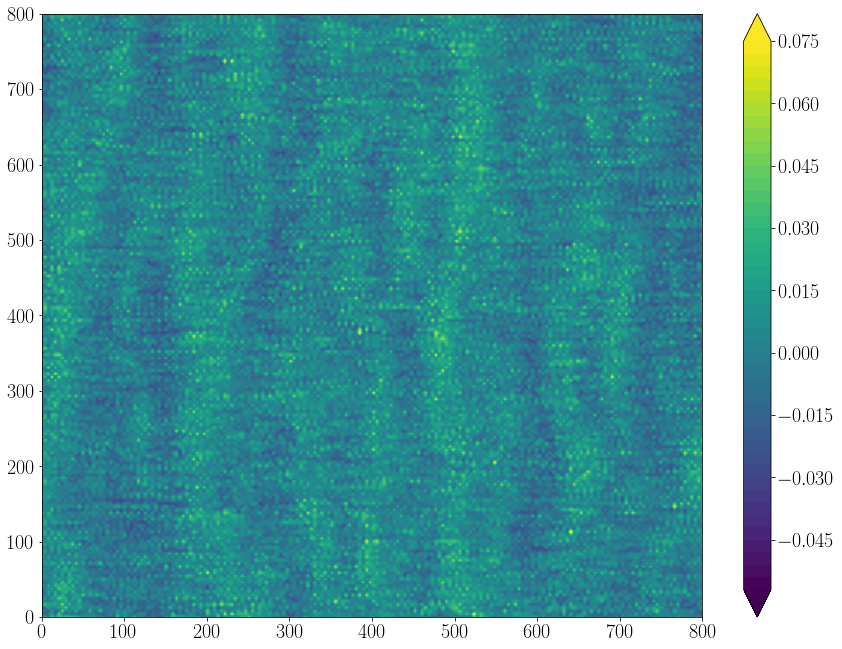

In [37]:
# plot x-y
up = dd.u_rot - dd.u_rot.mean(dim=("x","y"))

fig2, ax2 = plt.subplots(1, figsize=(14.8, 11.1))
cax2 = ax2.contourf(dd.x, dd.y, up.isel(z=90, time=-10).T, 
                    levels=50, extend="both")
cb2 = fig2.colorbar(cax2, ax=ax2, location="right")

(0.0, 1.0)

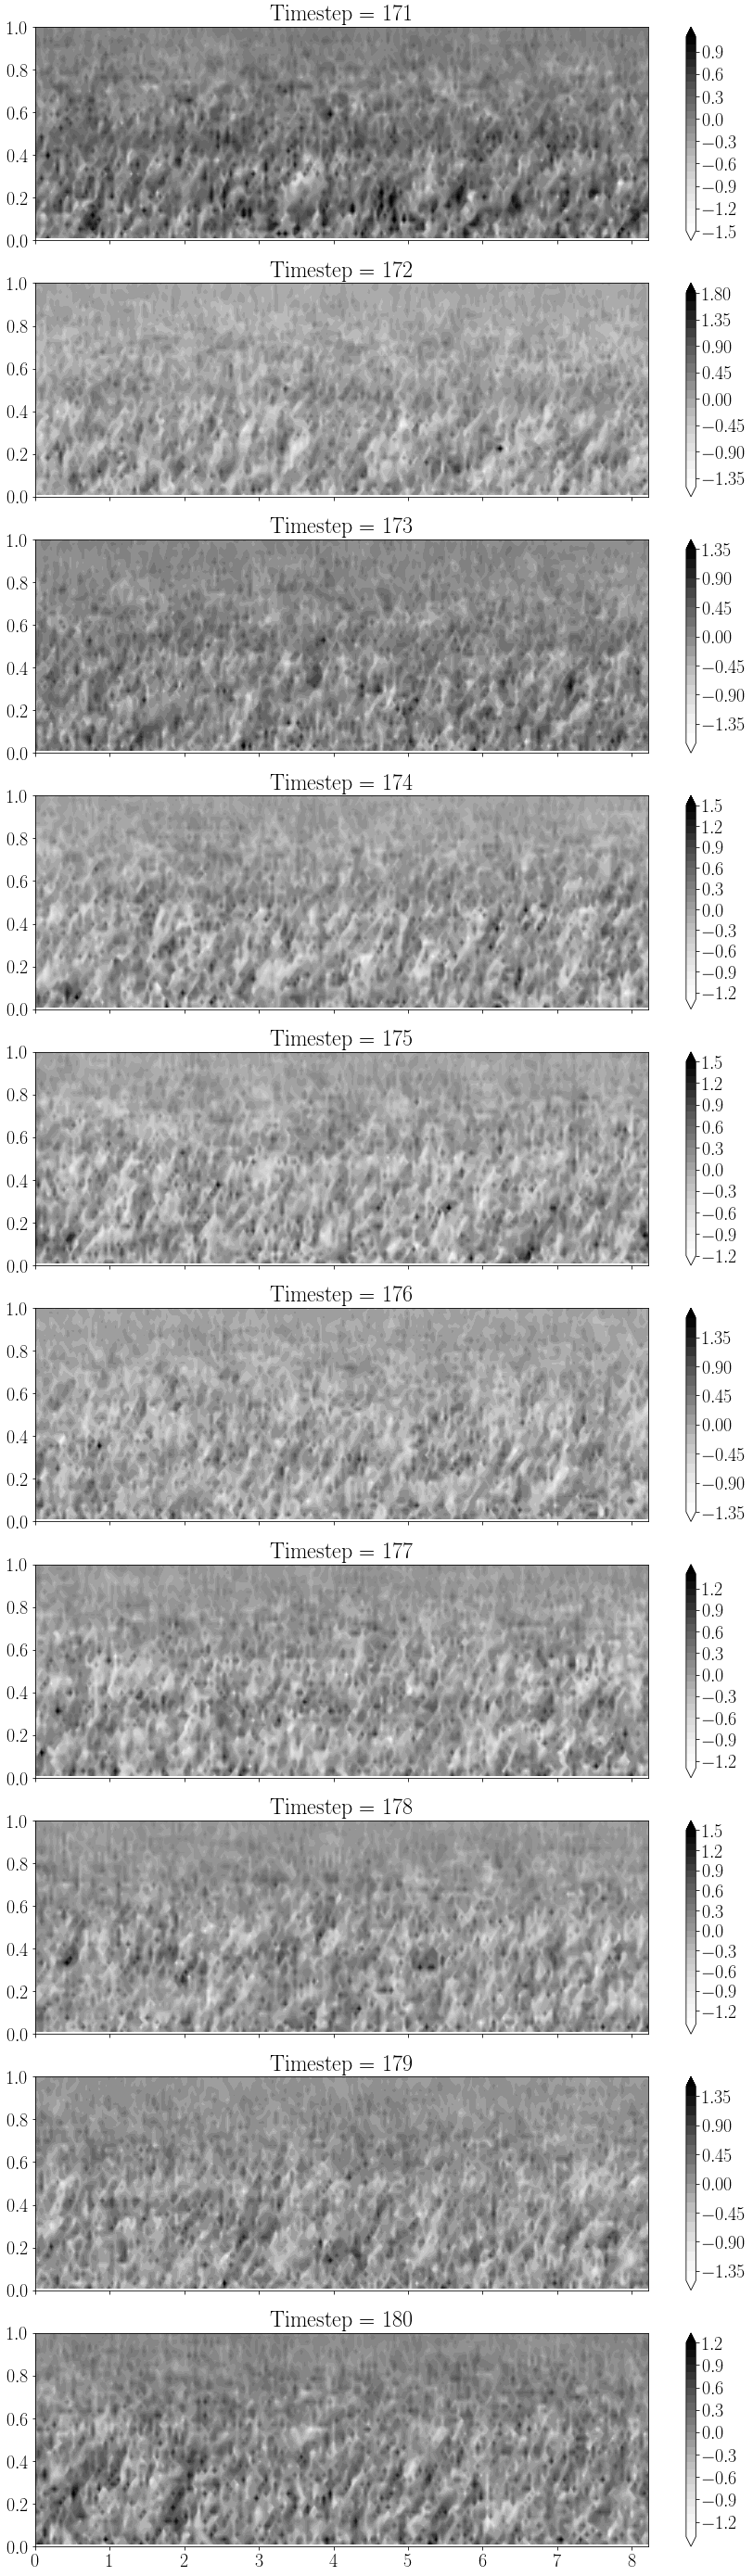

In [38]:
tp = dd.theta - dd.theta.mean(dim=("x","y"))
# plot x-z: theta
fig3, ax3 = plt.subplots(nrows=10, ncols=1, sharex=True, sharey=True, 
                         figsize=(14.8, 50))
for irow in range(10):
    cax3 = ax3[irow].contourf(dd.x/s.he, dd.z/s.he, 
                              tp.isel(y=96,time=171+irow).T, 
                              levels=30, extend="both",
                              cmap=plt.get_cmap("Greys"))
    cb3 = fig3.colorbar(cax3, ax=ax3[irow], location="right")
    ax3[irow].set_title(f"Timestep = {171+irow}")
ax3[0].set_ylim([0, 1])

(0.0, 1.0)

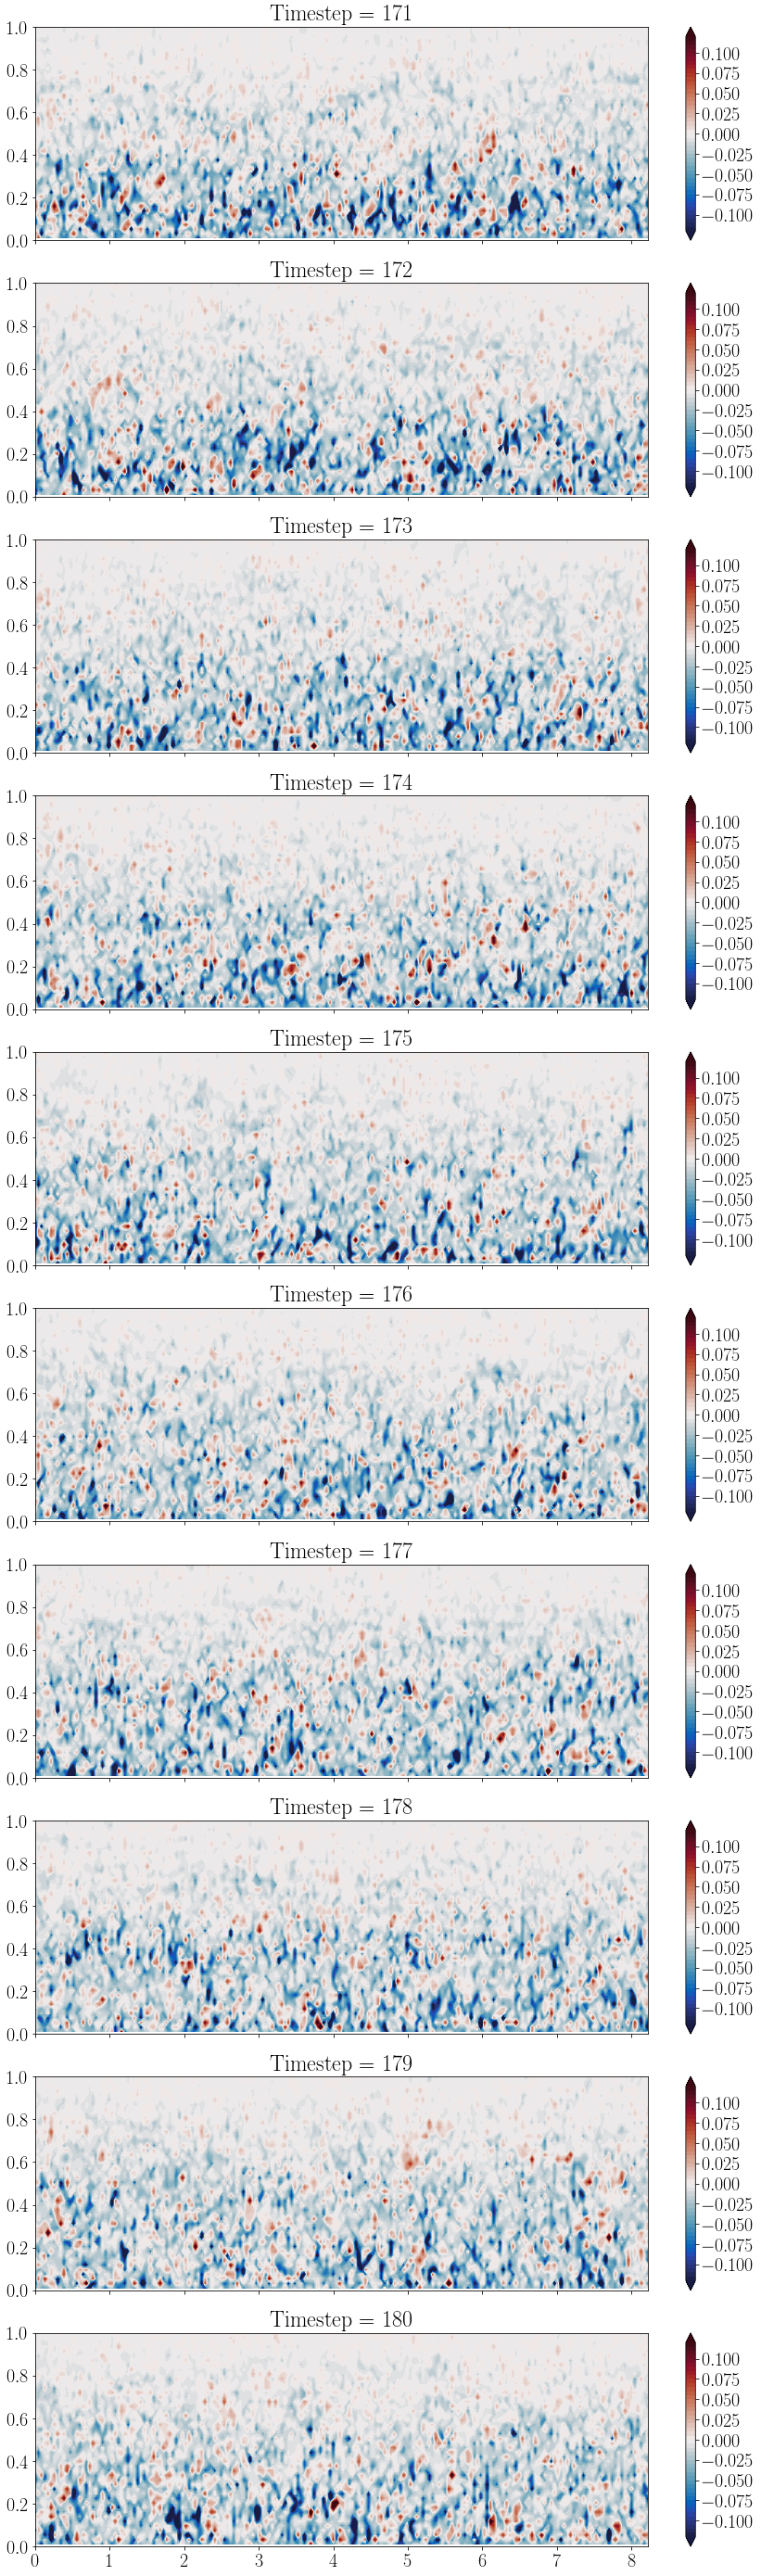

In [39]:
tp = dd.theta - dd.theta.mean(dim=("x","y"))
wp = dd.w - dd.w.mean(dim=("x","y"))
twp = tp * wp + dd.q3
# plot x-z: theta'w'
fig3, ax3 = plt.subplots(nrows=10, ncols=1, sharex=True, sharey=True, 
                         figsize=(14.8, 50))
for irow in range(10):
    cax3 = ax3[irow].contourf(dd.x/s.he, dd.z/s.he, 
                              twp.isel(y=96,time=171+irow).T, 
                              levels=np.linspace(-0.12, 0.12, 49), extend="both",
                              cmap=cmocean.cm.balance)
    cb3 = fig3.colorbar(cax3, ax=ax3[irow], location="right")
    ax3[irow].set_title(f"Timestep = {171+irow}")
ax3[0].set_ylim([0, 1])

In [45]:
# plot timeseries of xy-mean theta at various heights
# calculate here so can plot faster
theta_plot = dd.theta.mean(dim=("x", "y")).compute()

Text(0, 0.5, '$\\theta$ [K]')

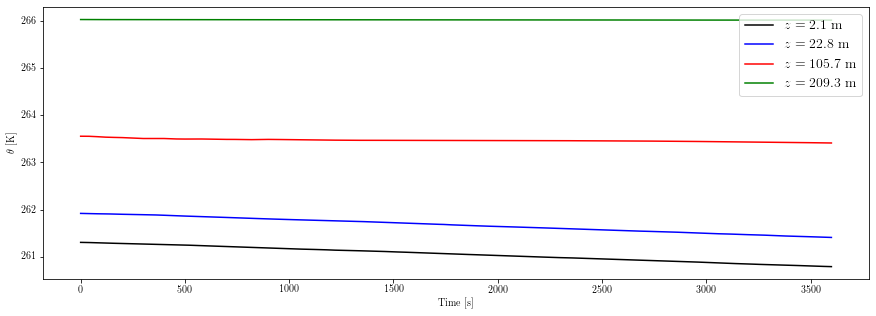

In [46]:
fig4, ax4 = plt.subplots(1, figsize=(14.8, 5))

ax4.plot(theta_plot.time, theta_plot.isel(z=0), c="k", label=f"$z = {{{dd.z[0].values:2.1f}}}$ m")
ax4.plot(theta_plot.time, theta_plot.isel(z=10), c="b", label=f"$z = {{{dd.z[10].values:2.1f}}}$ m")
ax4.plot(theta_plot.time, theta_plot.isel(z=50), c="r", label=f"$z = {{{dd.z[50].values:2.1f}}}$ m")
ax4.plot(theta_plot.time, theta_plot.isel(z=100), c="g", label=f"$z = {{{dd.z[100].values:2.1f}}}$ m")
# ax4.plot(theta_plot.time, theta_plot.isel(z=150), c="c", label=f"$z = {{{dd.z[150].values:2.1f}}}$ m")

ax4.legend(fontsize=14)
ax4.set_xlabel("Time [s]")
ax4.set_ylabel("$\\theta$ [K]")

# Detrend theta timeseries to calculate variance and compare with raw

In [7]:
# theta_detrend = detrend(dd.theta, axis=0, type="linear")
theta_detrend = np.zeros((dd.time.size, dd.nx, dd.ny, dd.nz), dtype=np.float64)
theta_xymean = dd.theta.mean(dim=("x","y")).compute()
# loop over heights to polyfit linear trends in time
for jz in range(dd.nz):
    print("jz=",jz)
    m, b = np.polyfit(dd.time.values, theta_xymean.isel(z=jz).values, deg=1)
    theta_detrend[:,:,:,jz] = dd.theta.isel(z=jz) - (m*dd.time + b)

theta_var_detrend = np.var(theta_detrend, axis=(0,1,2))
print(f"Theta var standard: {s.theta_var[0].values} K^2")
print(f"Theta var detrend: {theta_var_detrend[0]} K^2")

jz= 0
jz= 1
jz= 2
jz= 3
jz= 4
jz= 5
jz= 6
jz= 7
jz= 8
jz= 9
jz= 10
jz= 11
jz= 12
jz= 13
jz= 14
jz= 15
jz= 16
jz= 17
jz= 18
jz= 19
jz= 20
jz= 21
jz= 22
jz= 23
jz= 24
jz= 25
jz= 26
jz= 27
jz= 28
jz= 29
jz= 30
jz= 31
jz= 32
jz= 33
jz= 34
jz= 35
jz= 36
jz= 37
jz= 38
jz= 39
jz= 40
jz= 41
jz= 42
jz= 43
jz= 44
jz= 45
jz= 46
jz= 47
jz= 48
jz= 49
jz= 50
jz= 51
jz= 52
jz= 53
jz= 54
jz= 55
jz= 56
jz= 57
jz= 58
jz= 59
jz= 60
jz= 61
jz= 62
jz= 63
jz= 64
jz= 65
jz= 66
jz= 67
jz= 68
jz= 69
jz= 70
jz= 71
jz= 72
jz= 73
jz= 74
jz= 75
jz= 76
jz= 77
jz= 78
jz= 79
jz= 80
jz= 81
jz= 82
jz= 83
jz= 84
jz= 85
jz= 86
jz= 87
jz= 88
jz= 89
jz= 90
jz= 91
jz= 92
jz= 93
jz= 94
jz= 95
jz= 96
jz= 97
jz= 98
jz= 99
jz= 100
jz= 101
jz= 102
jz= 103
jz= 104
jz= 105
jz= 106
jz= 107
jz= 108
jz= 109
jz= 110
jz= 111
jz= 112
jz= 113
jz= 114
jz= 115
jz= 116
jz= 117
jz= 118
jz= 119
jz= 120
jz= 121
jz= 122
jz= 123
jz= 124
jz= 125
jz= 126
jz= 127
jz= 128
jz= 129
jz= 130
jz= 131
jz= 132
jz= 133
jz= 134
jz= 135
jz= 136
jz= 137
jz= 13

AttributeError: 'numpy.float64' object has no attribute 'values'

In [9]:
theta_detrend_scipy = detrend(dd.theta.values, axis=0, type="linear")
theta_var_detrend_scipy = np.var(theta_detrend_scipy, axis=(0,1,2))

(0.0, 1.2)

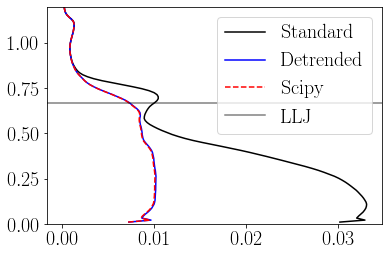

In [10]:
plt.plot(s.theta_var, s.z/s.he, "-k", label="Standard")
plt.plot(theta_var_detrend, s.z/s.he.values, "-b", label="Detrended")
plt.plot(theta_var_detrend_scipy, s.z/s.he.values, "--r", label="Scipy")
plt.axhline(s.zj/s.he.values, c="k", alpha=0.5, label="LLJ")
plt.legend()
plt.ylim([0, 1.2])

In [54]:
u_detrend = detrend(dd.u_rot, axis=0, type="linear")
u_var_detrend = np.var(u_detrend, axis=(0,1,2))
print(f"u var standard: {s.u_var_rot[0].values} m2s-2")
print(f"u var detrend: {u_var_detrend[0]} m2s-2")

Theta var standard: 0.12209774600219986 m2s-2
Theta var detrend: 0.11954660732739185 m2s-2


(0.0, 1.2)

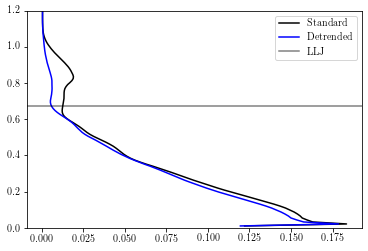

In [55]:
plt.plot(s.u_var_rot, s.z/s.he, "-k", label="Standard")
plt.plot(u_var_detrend, s.z/s.he.values, "-b", label="Detrended")
plt.axhline(s.zj/s.he.values, c="k", alpha=0.5, label="LLJ")
plt.legend()
plt.ylim([0, 1.2])

In [56]:
v_detrend = detrend(dd.v_rot, axis=0, type="linear")
v_var_detrend = np.var(v_detrend, axis=(0,1,2))
print(f"v var standard: {s.v_var_rot[0].values} m2s-2")
print(f"v var detrend: {v_var_detrend[0]} m2s-2")

v var standard: 0.08679162653459381 m2s-2
v var detrend: 0.08581902066222734 m2s-2


(0.0, 1.2)

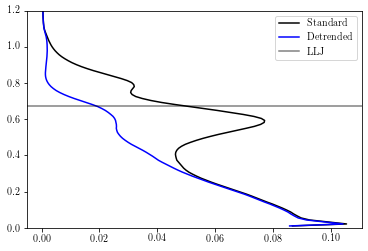

In [57]:
plt.plot(s.v_var_rot, s.z/s.he, "-k", label="Standard")
plt.plot(v_var_detrend, s.z/s.he.values, "-b", label="Detrended")
plt.axhline(s.zj/s.he.values, c="k", alpha=0.5, label="LLJ")
plt.legend()
plt.ylim([0, 1.2])

In [59]:
w_detrend = detrend(dd.w, axis=0, type="linear")
w_var_detrend = np.var(w_detrend, axis=(0,1,2))
print(f"w var standard: {s.w_var[0].values} m2s-2")
print(f"w var detrend: {w_var_detrend[0]} m2s-2")

w var standard: 0.0 m2s-2
w var detrend: 0.0 m2s-2


(0.0, 1.2)

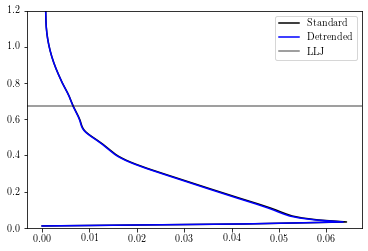

In [60]:
plt.plot(s.w_var, s.z/s.he, "-k", label="Standard")
plt.plot(w_var_detrend, s.z/s.he.values, "-b", label="Detrended")
plt.axhline(s.zj/s.he.values, c="k", alpha=0.5, label="LLJ")
plt.legend()
plt.ylim([0, 1.2])

he standard: 188.60165794066322 m
he detrend: 161.6601221640489 m
Ratio: 1.1666554213615816


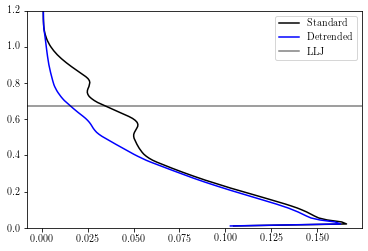

In [77]:
# calculate new TKE detrended
e_detrend = 0.5 * (u_var_detrend + v_var_detrend + w_var_detrend)
plt.plot(s.e, s.z/s.he, "-k", label="Standard")
plt.plot(e_detrend, s.z/s.he.values, "-b", label="Detrended")
plt.axhline(s.zj/s.he.values, c="k", alpha=0.5, label="LLJ")
plt.legend()
plt.ylim([0, 1.2])
# check if TKE-based sbl depth changes
ihe_detrend = np.where(e_detrend <= 0.05 * e_detrend[0])[0][0]
he_detrend = dd.z[ihe_detrend].values
print(f"he standard: {s.he.values} m")
print(f"he detrend: {he_detrend} m")
print(f"Ratio: {s.he.values/he_detrend}")

In [67]:
# resolved uw, vw, tw covars
uw_detrend = np.mean((u_detrend * w_detrend), axis=(0,1,2))
vw_detrend = np.mean((v_detrend * w_detrend), axis=(0,1,2))
ustar2_detrend = np.sqrt(uw_detrend**2 + vw_detrend**2)
tw_detrend = np.mean((theta_detrend * w_detrend), axis=(0,1,2))

(0.0, 1.2)

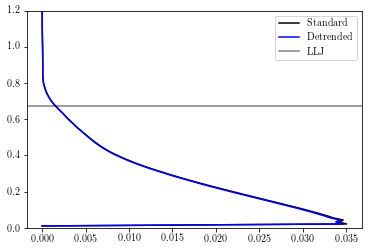

In [68]:
plt.plot(np.sqrt(s.uw_cov_res**2 + s.vw_cov_res**2), s.z/s.he, "-k", label="Standard")
plt.plot(ustar2_detrend, s.z/s.he.values, "-b", label="Detrended")
plt.axhline(s.zj/s.he.values, c="k", alpha=0.5, label="LLJ")
plt.legend()
plt.ylim([0, 1.2])

(0.0, 1.2)

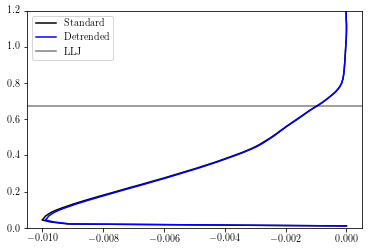

In [69]:
plt.plot(s.tw_cov_res, s.z/s.he, "-k", label="Standard")
plt.plot(tw_detrend, s.z/s.he.values, "-b", label="Detrended")
plt.axhline(s.zj/s.he.values, c="k", alpha=0.5, label="LLJ")
plt.legend()
plt.ylim([0, 1.2])

In [80]:
m, b = np.polyfit(np.linspace(0, 10, 11), 2*np.linspace(0, 10, 11), 1)

# Look at timeseries versus volume data

In [6]:
# load timeseries
ts = load_timeseries(dnc_all[-1], detrend=True, tavg="3h")
# ts = ts.where(ts.t >= 3600., drop=True)

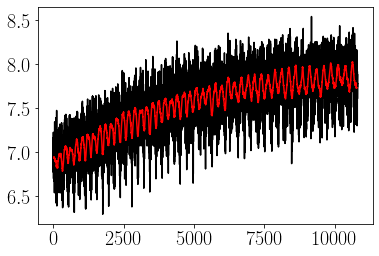

In [7]:
plt.plot(ts.t, ts.u[:,20], "-k")
plt.plot(ts.t, ts.u[:,20].rolling(t=50*60, center=True).mean(), "-r")

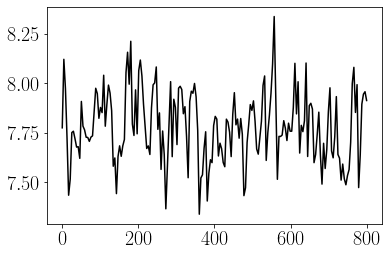

In [43]:
plt.plot(dd.x, dd.u[-1,:,96,20], "-k")

In [44]:
s.N2[20].values ** -0.5

11.002144709236843

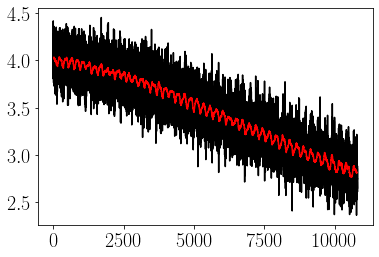

In [8]:
plt.plot(ts.t, ts.v[:,20], "-k")
plt.plot(ts.t, ts.v[:,20].rolling(t=50*60, center=True).mean(), "-r")

In [9]:
ts["ws"] = np.sqrt(ts.u**2. + ts.v**2.)

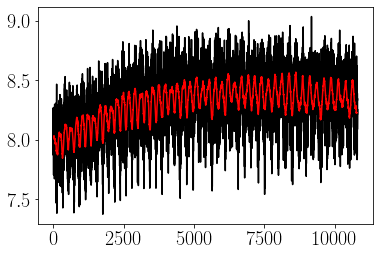

In [10]:
plt.plot(ts.t, ts.ws[:,20], "-k")
plt.plot(ts.t, ts.ws[:,20].rolling(t=50*60, center=True).mean(), "-r")

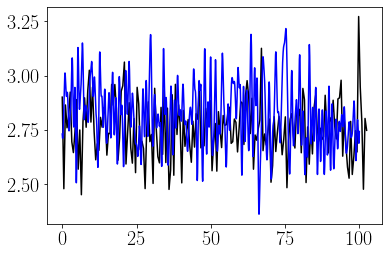

In [48]:
plt.plot(dd.x/s.u_mean[20], dd.v[-1,:,96,20], "-k")
plt.plot(ts.t[:5000], ts.v[-5000:,20], "-b")

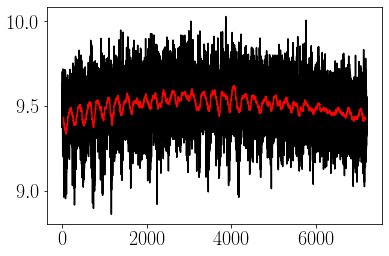

In [49]:
plt.plot(ts.t, ts.u_rot[:,25], "-k")
plt.plot(ts.t, ts.u_rot[:,25].rolling(t=50*60, center=True).mean(), "-r")

(0.0, 1.0)

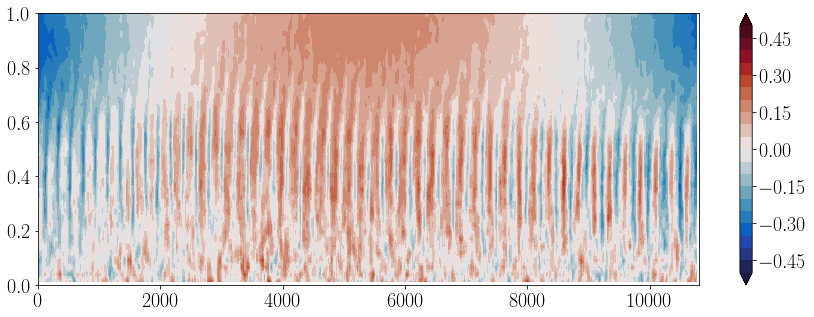

In [11]:
# time-height of timeseries u'
fig, ax = plt.subplots(1, figsize=(14.8, 5))
cfax = ax.contourf(ts.t, ts.z/s.h, (ts.ud.rolling(t=50*60, center=True).mean()).T, 
                   cmap=cmocean.cm.balance, levels=np.linspace(-0.5, 0.5, 21), extend="both")
cbar =  fig.colorbar(cfax, ax=ax, location="right")
ax.set_ylim([0, 1])

(0.0, 1.0)

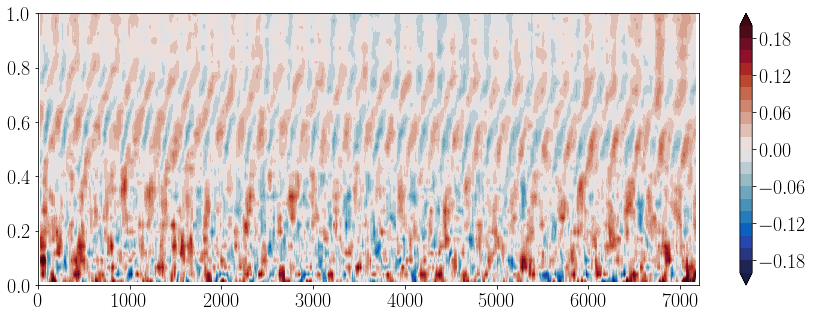

In [51]:
# time-height of timeseries v'
fig, ax = plt.subplots(1, figsize=(14.8, 5))
cfax = ax.contourf(ts.t, ts.z/s.h, (ts.vd.rolling(t=50*60, center=True).mean()).T, 
                   cmap=cmocean.cm.balance, levels=np.linspace(-0.2, 0.2, 21), extend="both")
cbar =  fig.colorbar(cfax, ax=ax, location="right")
ax.set_ylim([0, 1])

(0.0, 1.0)

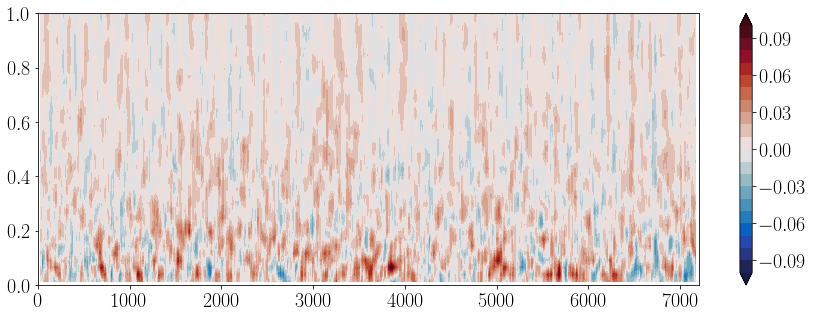

In [52]:
# time-height of timeseries w'
fig, ax = plt.subplots(1, figsize=(14.8, 5))
cfax = ax.contourf(ts.t, ts.z/s.h, (ts.wd.rolling(t=50*60, center=True).mean()).T, 
                   cmap=cmocean.cm.balance, levels=np.linspace(-0.1, 0.1, 21), extend="both")
cbar =  fig.colorbar(cfax, ax=ax, location="right")
ax.set_ylim([0, 1])

(0.0, 1.0)

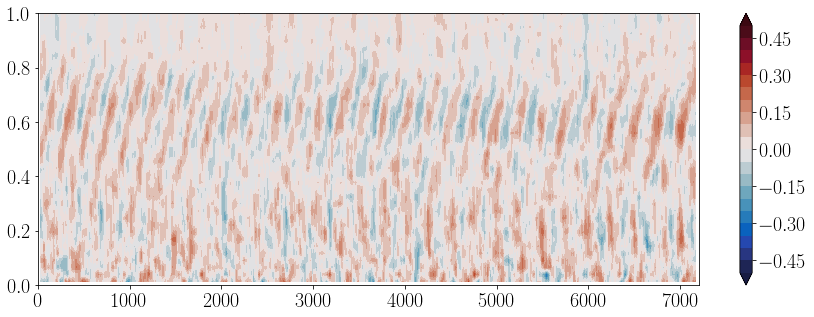

In [53]:
# time-height of timeseries theta'
fig, ax = plt.subplots(1, figsize=(14.8, 5))
cfax = ax.contourf(ts.t, ts.z/s.h, (ts.td.rolling(t=50*60, center=True).mean()).T, 
                   cmap=cmocean.cm.balance, levels=np.linspace(-0.5, 0.5, 21), extend="both")
cbar =  fig.colorbar(cfax, ax=ax, location="right")
ax.set_ylim([0, 1])

# Vorticity

In [51]:
# only load a few timesteps
dd, s = load_full(dnc_all[0], 1254000, 1260000, 1000, 0.02, True, True)

Loading files...
Reading file: /home/bgreene/simulations/cr0.10_u08_192/output/netcdf/average_statistics.nc


/home/bgreene/anaconda3/lib/python3.7/site-packages/xarray/core/computation.py:742: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)


In [52]:
# detrend in time
# grab data
uraw = dd.u.to_numpy()
vraw = dd.v.to_numpy()
wraw = dd.w.to_numpy()
# detrend with scipy function
ud = detrend(uraw, axis=0, type="linear")
vd = detrend(vraw, axis=0, type="linear")
wd = detrend(wraw, axis=0, type="linear")
# calculate time mean for smoothing
# u = ud.mean(axis=0)
# v = vd.mean(axis=0)
# w = wd.mean(axis=0)
u = ud[-1,:,:,:]
v = vd[-1,:,:,:]
w = wd[-1,:,:,:]
# convert back to xarray
dat = xr.Dataset()
dat["u"] = xr.DataArray(data=u, dims=("x","y","z"), coords=dict(x=dd.x, y=dd.y, z=dd.z))
dat["v"] = xr.DataArray(data=v, dims=("x","y","z"), coords=dict(x=dd.x, y=dd.y, z=dd.z))
dat["w"] = xr.DataArray(data=w, dims=("x","y","z"), coords=dict(x=dd.x, y=dd.y, z=dd.z))
# calculat vorticity components
vort_x = (dat.w.differentiate("y", 2) - dat.v.differentiate("z", 2)).compute()
vort_y = (dat.u.differentiate("z", 2) - dat.w.differentiate("x", 2)).compute()
vort_z = (dat.v.differentiate("x", 2) - dat.u.differentiate("y", 2)).compute()
vort_mag_2 = vort_x*vort_x + vort_y*vort_y + vort_z*vort_z

In [61]:
(s.z[80]/s.h).values

array(0.78435455)

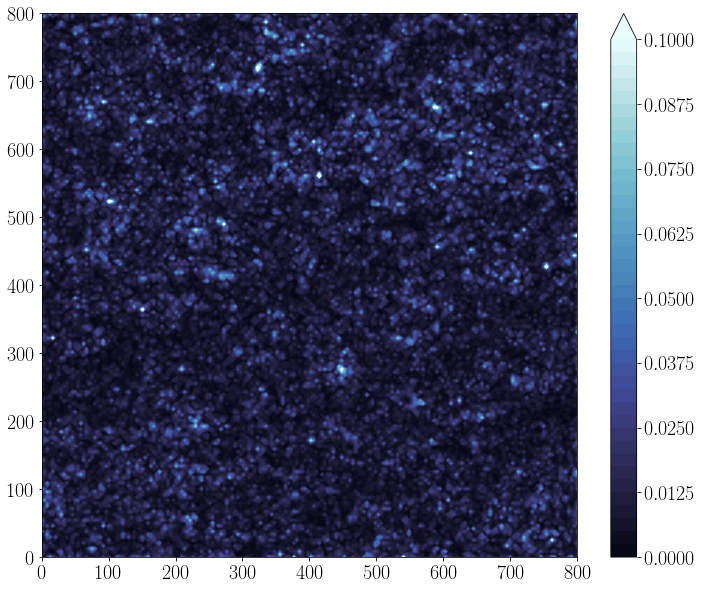

In [80]:
fig, ax = plt.subplots(1, figsize=(12, 10))
cax = ax.contourf(dd.x, dd.y, vort_mag_2.isel(z=25).T,
                  levels=np.linspace(0.0, 0.1, 41), 
                  cmap=cmocean.cm.ice, extend="max")
cb = fig.colorbar(cax, ax=ax, location="right")

Text(0.5, 1.0, '$\\omega_z$')

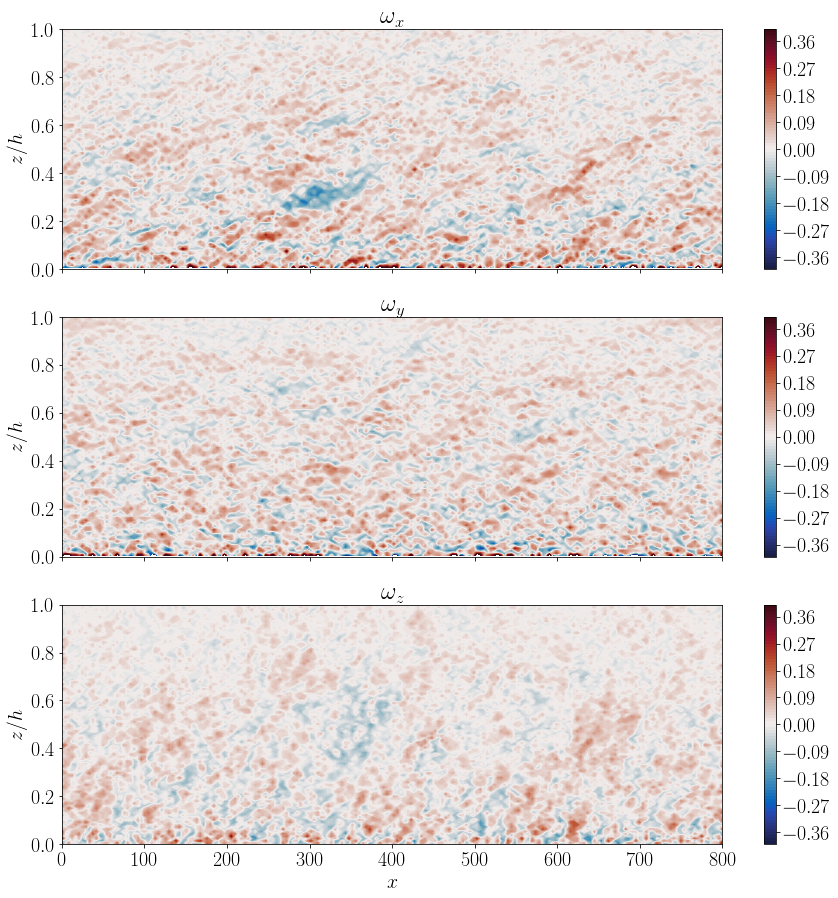

In [56]:
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=True, figsize=(14.8, 15))
# x-vorticity
cax1 = ax[0].contourf(dd.x, dd.z/s.h, vort_x.isel(y=96).T,
                      levels=np.linspace(-0.4, 0.4, 81), cmap=cmocean.cm.balance)
cb1 = fig.colorbar(cax1, ax=ax[0], location="right")
# y-vorticity
cax2 = ax[1].contourf(dd.x, dd.z/s.h, vort_y.isel(y=96).T,
                      levels=np.linspace(-0.4, 0.4, 81), cmap=cmocean.cm.balance)
cb2 = fig.colorbar(cax2, ax=ax[1], location="right")
# z-vorticity
cax3 = ax[2].contourf(dd.x, dd.z/s.h, vort_z.isel(y=96).T,
                      levels=np.linspace(-0.4, 0.4, 81), cmap=cmocean.cm.balance)
cb3 = fig.colorbar(cax3, ax=ax[2], location="right")

ax[0].set_ylim([0, 1])
for iax in ax:
    iax.set_ylabel("$z/h$")
ax[2].set_xlabel("$x$")

ax[0].set_title("$\\omega_x$")
ax[1].set_title("$\\omega_y$")
ax[2].set_title("$\\omega_z$")

(0.0, 1.0)

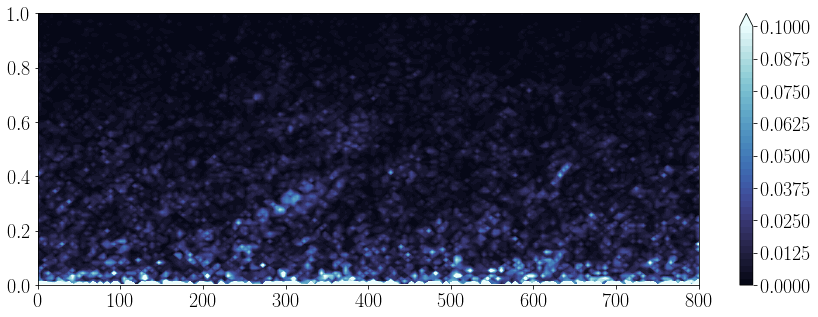

In [67]:
fig, ax = plt.subplots(1, figsize=(14.8, 5))
# x-vorticity
cax = ax.contourf(dd.x, dd.z/s.h, vort_mag_2.isel(y=96).T,
                      levels=np.linspace(0, 0.1, 41), 
                      cmap=cmocean.cm.ice, extend="max")
cb = fig.colorbar(cax, ax=ax, location="right")
ax.set_ylim([0, 1])

In [ ]:
# 3d isosurface of vort_mag_2 = 0.1
